In [6]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [7]:
# Charger les données
df = pd.read_csv('data/balanced_data.csv')

# Vérifier les premières lignes pour comprendre la structure
print(df.head())

# Mise à jour de la colonne 'anomalie' en fonction de la colonne 'type'
df['anomalie'] = df['type'].apply(lambda x: 0 if str(x).strip().lower() == 'pas d\'anomalie' else 1)

# Vérification des résultats
print(df[['type', 'anomalie']].head())


  user_number             datetime  Consommation  cluster anomalie  \
0        0_39  2016-03-01 01:02:47             7      0.0      0.0   
1        0_39  2016-03-01 02:02:47             8      0.0      0.0   
2        0_39  2016-03-01 03:02:45             3      0.0      0.0   
3        0_39  2016-03-01 04:02:45             0      0.0      0.0   
4        0_39  2016-03-01 05:02:45             0      0.0      0.0   

             type  
0  pas d'anomalie  
1  pas d'anomalie  
2  pas d'anomalie  
3  pas d'anomalie  
4  pas d'anomalie  
             type  anomalie
0  pas d'anomalie         0
1  pas d'anomalie         0
2  pas d'anomalie         0
3  pas d'anomalie         0
4  pas d'anomalie         0


C:\Users\asus\AppData\Local\Temp\ipykernel_14488\2443782245.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/balanced_data.csv')



--- Modèle pour Cluster 0 ---
Accuracy pour le Cluster 0: 0.9908
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15278
           1       0.95      0.79      0.86       577

    accuracy                           0.99     15855
   macro avg       0.97      0.89      0.93     15855
weighted avg       0.99      0.99      0.99     15855



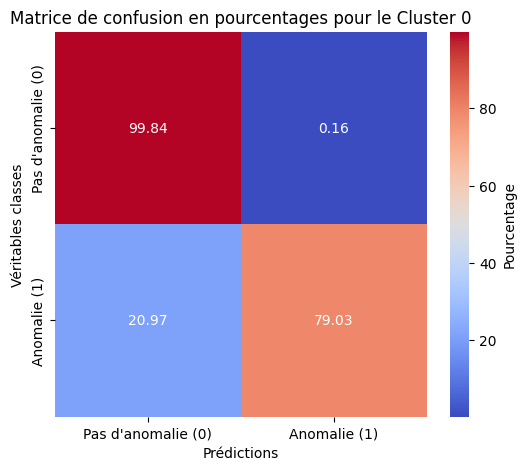

In [19]:
# Filtrer les données pour le cluster 0
cluster = 0
print(f"\n--- Modèle pour Cluster {cluster} ---")

cluster_data = df[df['cluster'] == cluster]

if len(cluster_data) > 0:
    X = cluster_data[['Consommation']]  # Features
    y = cluster_data['anomalie']  # Labels (0: pas d'anomalie, 1: anomalie)

    # Diviser les données en train et test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Créer le modèle XGBoost pour classification binaire
    model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=42)
    
    # Entraîner le modèle
    model.fit(X_train, y_train)
    
    # Prédire les anomalies
    y_pred = model.predict(X_test)
    
    # Évaluer l'accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy pour le Cluster {cluster}: {accuracy:.4f}")
    
    # Afficher le rapport de classification
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Calculer la matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    
    # Convertir la matrice de confusion en pourcentages
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
 
    # Affichage de la matrice de confusion sous forme de graphique
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=['Pas d\'anomalie (0)', 'Anomalie (1)'], yticklabels=['Pas d\'anomalie (0)', 'Anomalie (1)'], cbar_kws={'label': 'Pourcentage'})
    
    plt.title(f"Matrice de confusion en pourcentages pour le Cluster {cluster}")
    plt.xlabel('Prédictions')
    plt.ylabel('Véritables classes')
    plt.show()

else:
    print(f"Pas de données pour le cluster {cluster}.")

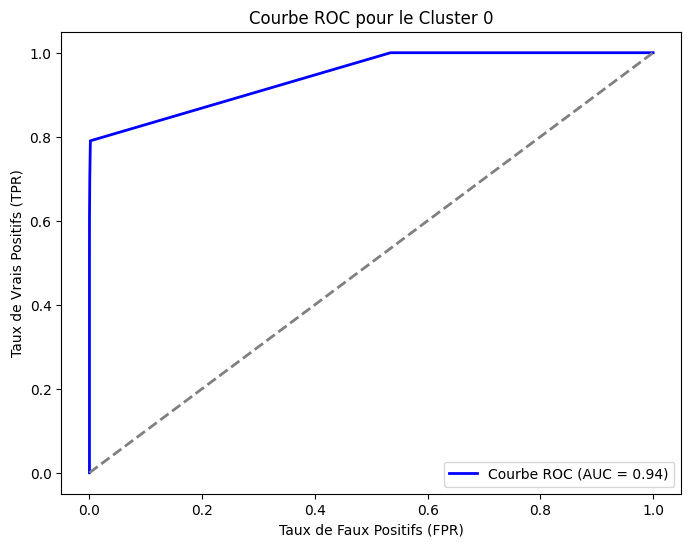

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import xgboost as xgb

# Prédictions de probabilité pour la classe "anomalie" (classe 1)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilité pour la classe 'anomalie'

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Ligne diagonale (modèle aléatoire)
plt.title(f'Courbe ROC pour le Cluster {cluster}')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.legend(loc='lower right')
plt.show()



--- Modèle pour Cluster 1 ---
Accuracy pour le Cluster 1: 0.9750
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18022
           1       1.00      0.79      0.88      2409

    accuracy                           0.97     20431
   macro avg       0.99      0.89      0.93     20431
weighted avg       0.98      0.97      0.97     20431



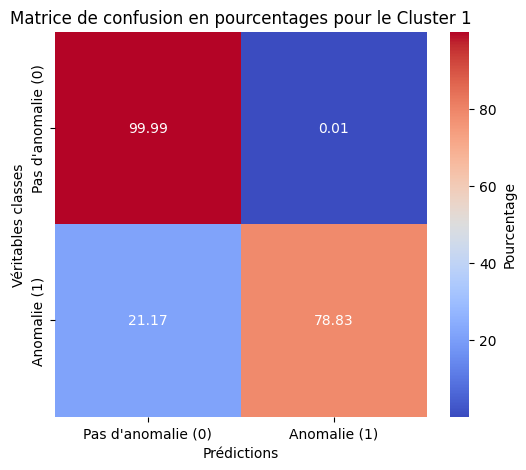

In [22]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Filtrer les données pour le cluster 1
cluster = 1
print(f"\n--- Modèle pour Cluster {cluster} ---")

cluster_data = df[df['cluster'] == cluster]

if len(cluster_data) > 0:
    X = cluster_data[['Consommation']]  # Features
    y = cluster_data['anomalie']  # Labels (0: pas d'anomalie, 1: anomalie)

    # Diviser les données en train et test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Créer le modèle XGBoost pour classification binaire
    model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=42)
    
    # Entraîner le modèle
    model.fit(X_train, y_train)
    
    # Prédire les anomalies
    y_pred = model.predict(X_test)
    
    # Évaluer l'accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy pour le Cluster {cluster}: {accuracy:.4f}")
    
    # Afficher le rapport de classification
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Calculer la matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    
    # Convertir la matrice de confusion en pourcentages
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
   
    # Affichage de la matrice de confusion sous forme de graphique
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=['Pas d\'anomalie (0)', 'Anomalie (1)'], yticklabels=['Pas d\'anomalie (0)', 'Anomalie (1)'], cbar_kws={'label': 'Pourcentage'})
    
    plt.title(f"Matrice de confusion en pourcentages pour le Cluster {cluster}")
    plt.xlabel('Prédictions')
    plt.ylabel('Véritables classes')
    plt.show()

else:
    print(f"Pas de données pour le cluster {cluster}.")


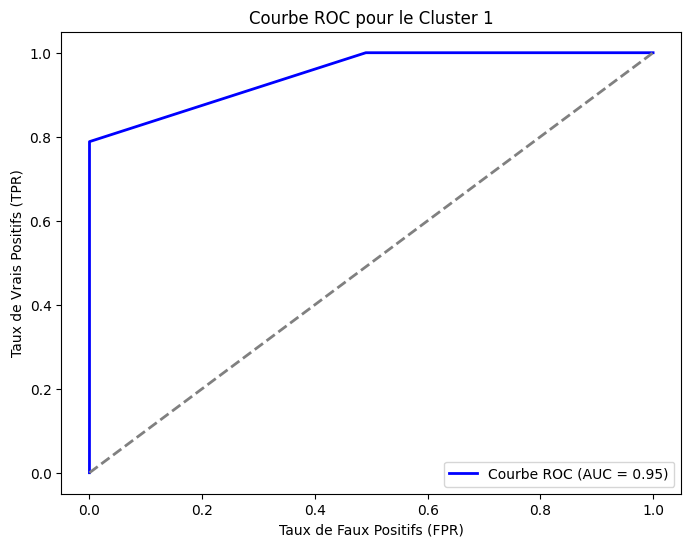

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import xgboost as xgb

# Prédictions de probabilité pour la classe "anomalie" (classe 1)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilité pour la classe 'anomalie'

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Ligne diagonale (modèle aléatoire)
plt.title(f'Courbe ROC pour le Cluster {cluster}')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.legend(loc='lower right')
plt.show()



--- Modèle pour Cluster 2 ---
Accuracy pour le Cluster 2: 0.9890
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     29048
           1       0.99      0.76      0.86      1359

    accuracy                           0.99     30407
   macro avg       0.99      0.88      0.93     30407
weighted avg       0.99      0.99      0.99     30407



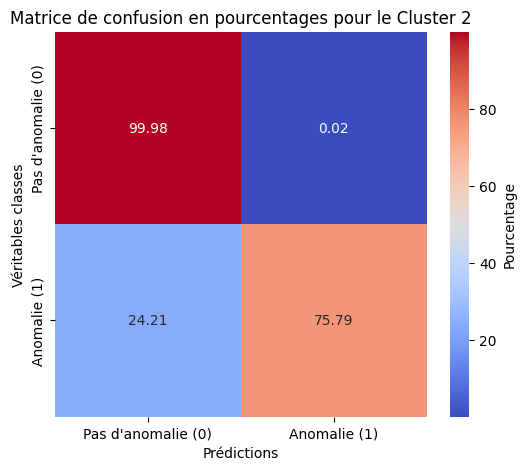

In [24]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Filtrer les données pour le cluster 2
cluster = 2
print(f"\n--- Modèle pour Cluster {cluster} ---")

cluster_data = df[df['cluster'] == cluster]

if len(cluster_data) > 0:
    X = cluster_data[['Consommation']]  # Features
    y = cluster_data['anomalie']  # Labels (0: pas d'anomalie, 1: anomalie)

    # Diviser les données en train et test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Créer le modèle XGBoost pour classification binaire
    model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=42)
    
    # Entraîner le modèle
    model.fit(X_train, y_train)
    
    # Prédire les anomalies
    y_pred = model.predict(X_test)
    
    # Évaluer l'accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy pour le Cluster {cluster}: {accuracy:.4f}")
    
    # Afficher le rapport de classification
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Calculer la matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    
    # Convertir la matrice de confusion en pourcentages
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
   
    # Affichage de la matrice de confusion sous forme de graphique
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=['Pas d\'anomalie (0)', 'Anomalie (1)'], yticklabels=['Pas d\'anomalie (0)', 'Anomalie (1)'], cbar_kws={'label': 'Pourcentage'})
    
    plt.title(f"Matrice de confusion en pourcentages pour le Cluster {cluster}")
    plt.xlabel('Prédictions')
    plt.ylabel('Véritables classes')
    plt.show()

else:
    print(f"Pas de données pour le cluster {cluster}.")


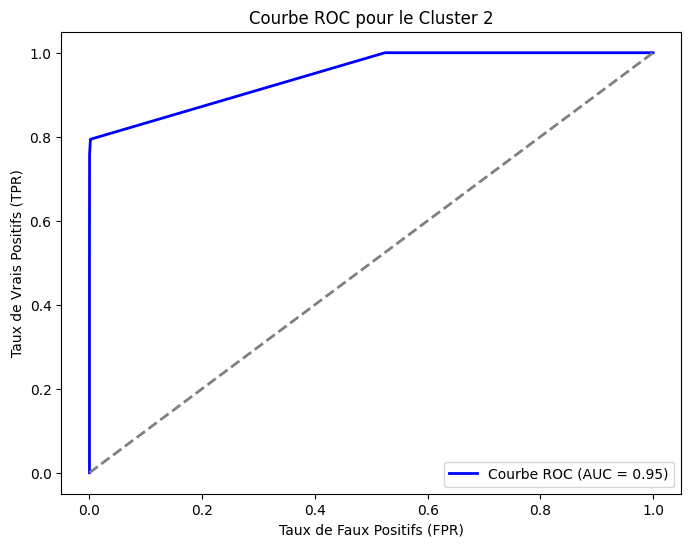

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import xgboost as xgb

# Prédictions de probabilité pour la classe "anomalie" (classe 1)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilité pour la classe 'anomalie'

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Ligne diagonale (modèle aléatoire)
plt.title(f'Courbe ROC pour le Cluster {cluster}')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.legend(loc='lower right')
plt.show()
